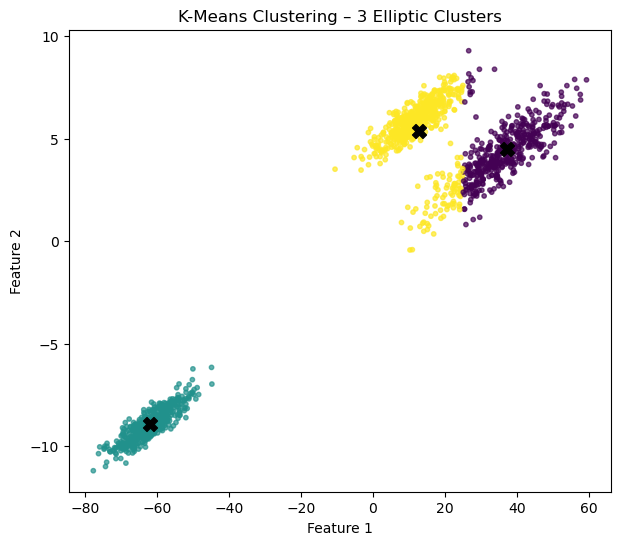

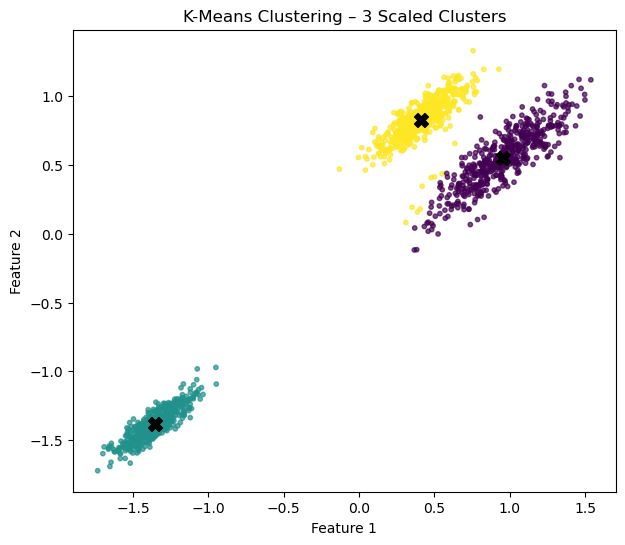

In [7]:
# Zadanie 1
import numpy as np
from sklearn.datasets import make_blobs
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans


X, y = make_blobs(
    n_samples=1500,
    centers=3,
    cluster_std=[1.0, 1.5, 0.8],  
    random_state=42
)

transformation = np.array([
    [6.0,  3.0],  
    [ 0.5,  0.8]    
])

X_elliptic = X @ transformation.T

# clustering on unprepared elliptic data
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(X_elliptic)

# plotting the result
import matplotlib.pyplot as plt
plt.figure(figsize=(7, 6))

plt.scatter(
    X_elliptic[:, 0],
    X_elliptic[:, 1],
    c=kmeans.predict(X_elliptic),          
    s=10,               
    alpha=0.7
)

# Plot centroids 
plt.scatter(
    kmeans.cluster_centers_[:, 0],
    kmeans.cluster_centers_[:, 1],
    c='black',
    s=100,
    marker='X'
)

plt.title("K-Means Clustering – 3 Elliptic Clusters")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()

scaler = StandardScaler()
scaler.fit(X_elliptic)
X_scaled = scaler.transform(X_elliptic)

kmeans2 = KMeans(n_clusters=3, random_state=42)
kmeans2.fit(X_scaled)

plt.figure(figsize=(7, 6))

plt.scatter(
    X_scaled[:, 0],
    X_scaled[:, 1],
    c=kmeans2.predict(X_scaled),          
    s=10,               
    alpha=0.7
)

plt.scatter(
    kmeans2.cluster_centers_[:, 0],
    kmeans2.cluster_centers_[:, 1],
    c='black',
    s=100,
    marker='X'
)

plt.title("K-Means Clustering – 3 Scaled Clusters")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()


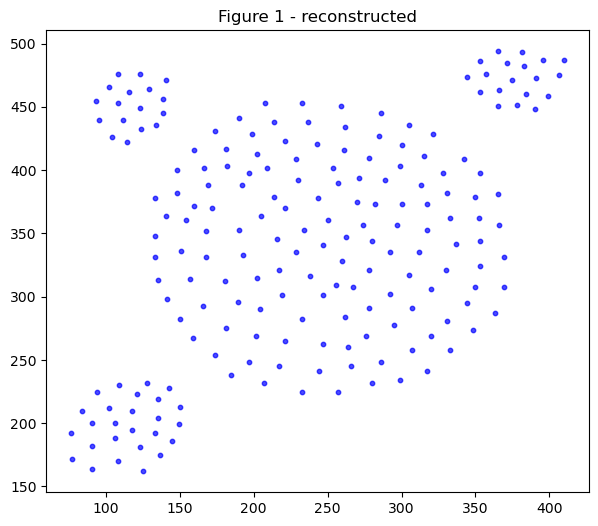

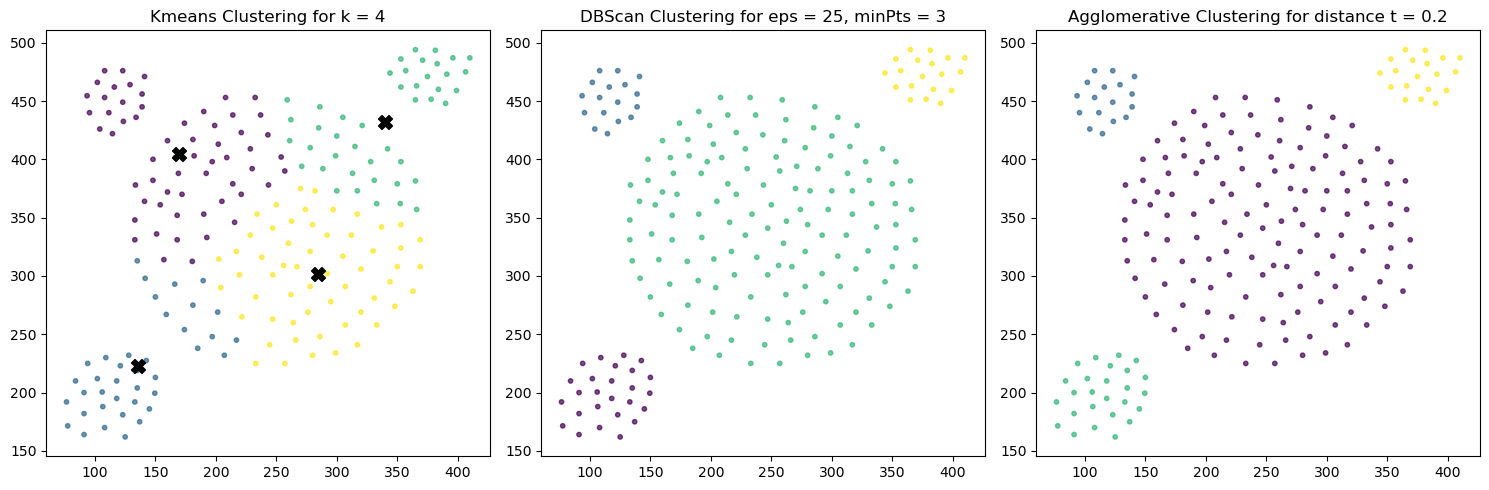

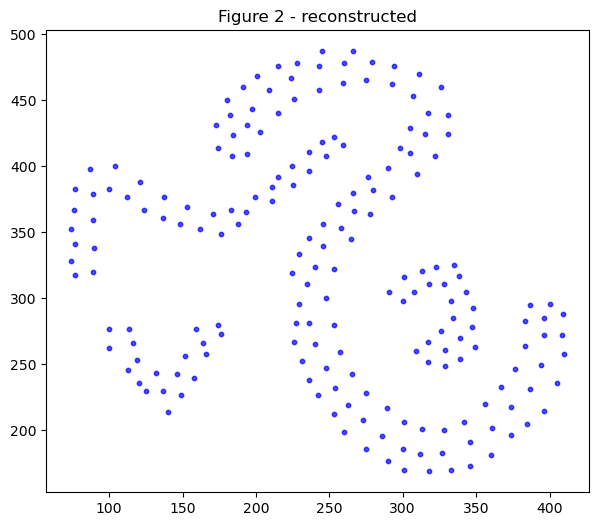

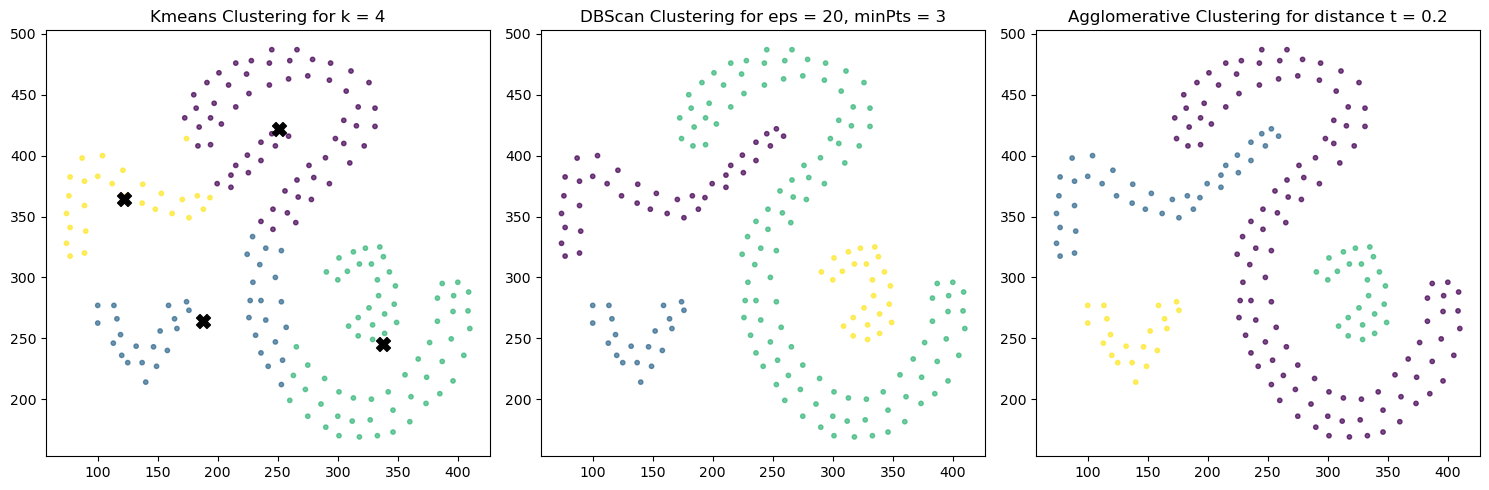

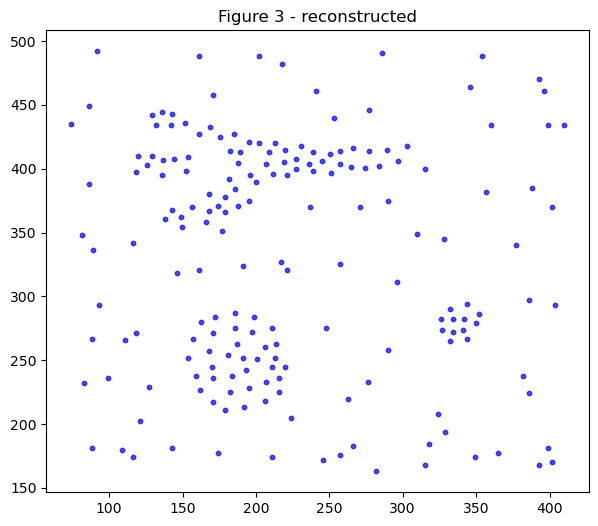

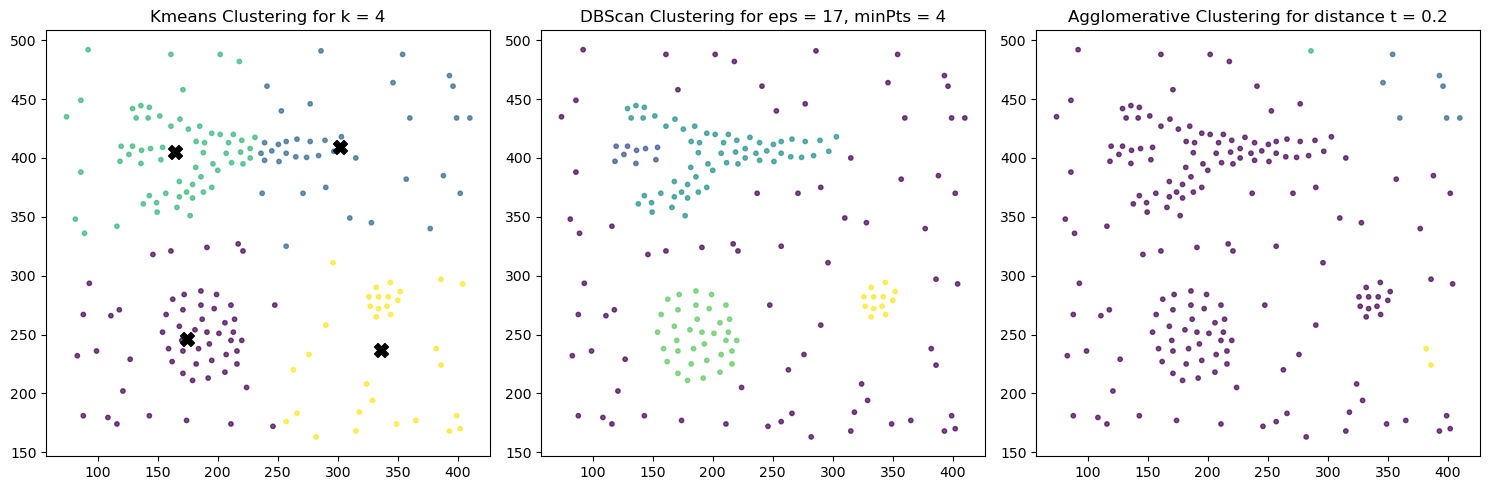

In [3]:
# Zadanie 2
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans, DBSCAN
from sklearn.cluster import AgglomerativeClustering

def work_figure(fig_number, k, eps, minPts, dt):
    img = Image.open(f"f{fig_number}.png").convert("L")  
    arr = np.array(img)
    mask = arr < 230

    x1, x2 = np.where(mask)
    pixels = np.stack((x1, x2), axis=1)

    db = DBSCAN(eps=1, min_samples=1).fit(pixels)
    labels = db.labels_
    unique_labels = [l for l in set(labels)]
    points = []
    for l in unique_labels:
        cluster_pixels = pixels[labels == l]
        point = cluster_pixels.mean(axis=0)
        points.append(point)

    points = np.array(points)

    plt.figure(figsize=(7, 6))
    plt.scatter(
        points[:, 0],
        points[:, 1],
        c='blue',
        s=10,
        alpha=0.7
    )
    plt.title(f"Figure {fig_number} - reconstructed")
    plt.show()


    fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(15, 5))

    #Kmeans
    kmeans = KMeans(n_clusters=k, n_init=10, random_state=42)
    kmeans.fit(points)
    labels = kmeans.predict(points)

    ax1.scatter(
        points[:, 0],
        points[:, 1],
        c = labels,
        cmap='viridis',
        s=10,
        alpha=0.7
    )
    ax1.scatter(
        kmeans.cluster_centers_[:, 0],
        kmeans.cluster_centers_[:, 1],
        c='black',
        marker='X',
        s=100
    )
    ax1.set_title(f"Kmeans Clustering for k = {k}")

    # DBScan
    # eps = 12
    # minPts = 5
    db = DBSCAN(eps = eps, min_samples = minPts)
    db.fit(points)
    labels2 = db.labels_

    ax2.scatter(
        points[:, 0],
        points[:, 1],
        c = labels2,
        s=10,
        cmap='viridis',
        alpha=0.7
    )
    ax2.set_title(f"DBScan Clustering for eps = {eps}, minPts = {minPts}")

    # Agglomerative Clustering

    # dt = 5.0
    model = AgglomerativeClustering(
        n_clusters=4,
        distance_threshold=None,     
        linkage='single'             
    )
    model.fit(points)
    labels3 = model.labels_

    ax3.scatter(
        points[:, 0],
        points[:, 1],
        c = labels3,
        cmap='viridis',
        s=10,
        alpha=0.7
    )
    ax3.set_title(f"Agglomerative Clustering for distance t = {dt}")


    #plt.title(f"Clustering methods for figure {fig_number}")
    plt.tight_layout()
    plt.show()
    
    

work_figure(1, 4, 25, 3, 0.2)
work_figure(2, 4, 20, 3, 0.2)
work_figure(3, 4, 17, 4, 0.2)